/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


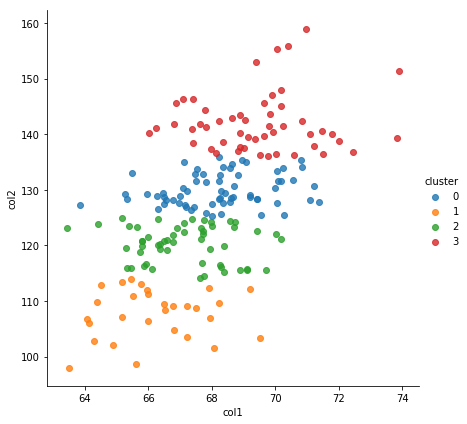

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#uncomment below if using Jupyter
#%config InlineBackend.figure_format = 'retina'

# get data
df = pd.read_csv('dualcolumn.csv')

def k_means_clustering(col1, col2, clusters, steps=100):
    '''
    Takes in two dataframe columns and outputs plot of clusters.
    '''
    vec_vals = []
    for i in range(len(col1)):
        a = col1[i]
        b = col2[i]
        vec_vals.append([a, b])
    v_vals = np.array(vec_vals)
    np.random.shuffle(v_vals)    
    
    sess = tf.Session()
    k = clusters
    points = v_vals
    data = tf.constant(points)
    
    # random initial centroids (points shuffled above)
    centroids = tf.Variable(data[:k, :])

    # add k dim to data and n dim to centroids to make matrices compatible
    # for array operations instead of loops
    data_expanded = tf.expand_dims(data, 0)
    centroids_expanded = tf.expand_dims(centroids, 1)

    # computes squared Euclidean distance between every point and every centroid
    # and get closest centroid for each point
    allocations = tf.argmin(tf.reduce_sum(tf.square(data_expanded - centroids_expanded), 2), 0)

    sess.run(tf.global_variables_initializer())
    c = 0 # index of centroid
    tf.equal(allocations, c)
    tf.gather(data, tf.where(tf.equal(allocations, c)))

    means = tf.concat(
        [tf.reduce_mean(
            tf.gather(data,
                      tf.where(tf.equal(allocations, c))), 0) for c in range(k)], 0)

    update_centroids = tf.assign(centroids, means)

    for step in range(steps):
        _, centroid_values, allocation_values = sess.run([update_centroids, centroids, allocations])
        
    clusters_df = pd.DataFrame({col1.name: points[:,0], col2.name: points[:,1], "cluster": allocation_values})
    sns.lmplot(col1.name, col2.name, data=clusters_df, fit_reg=False, size=6, hue="cluster")
    plt.show()
    
    
k_means_clustering(df['col1'], df['col2'], 4)